In [21]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import pandas as pd 
%matplotlib inline

In [2]:
seq_name = "RaceHorses"
QP = "QP22"

In [3]:
def frame_processing(filename,currframe = 0):
    f = open("D:/frame/"+filename+"/"+filename+'%d'%currframe+'.txt', "r")
    rowlist = []
    for line in f:
        rowpix = line.split(" ")
        results = [int(i) for i in rowpix[:-1]]
        rowlist.append(results)
    img = np.asarray(rowlist)
    img = img /4
    return img

In [4]:
def frame_padding(frame,CTU_size = 128):
    width , height = frame.shape[1],frame.shape[0]
    #print(width,height)
    width_CTU_nums = math.ceil(width/128)
    height_CTU_nums = math.ceil(height/128)
    pad_frame = np.zeros((height_CTU_nums*128,width_CTU_nums*128))
    for x in range(height):
        for y in range(width):
            pad_frame[x][y] = frame[x][y]
    return pad_frame

In [5]:
img = frame_processing(seq_name,0)
yuv_img_padding = frame_padding(img)

origin frame:


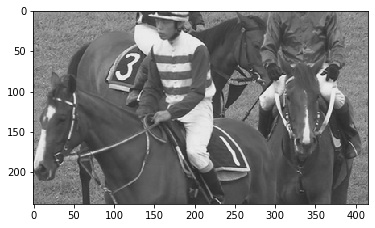

In [6]:
yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')

print("origin frame:")
plt.imshow(yuv_img)

padding frame:


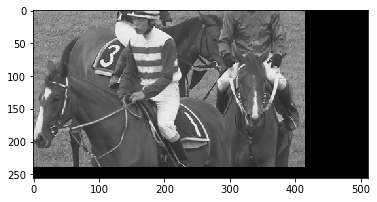

In [7]:
print("padding frame:")
yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
plt.imshow(yuv_img_padding)

In [8]:
def frame_partition(test_seq,unit , img , yuv_img , QP = "QP" , currframe = 0):
    frame_width , frame_height = img.shape[1],img.shape[0]
    CTU_NUM = math.ceil(frame_width/128) * math.ceil(frame_height/128)
    frame_partition = np.zeros((frame_height,frame_width))
    fig,ax = plt.subplots(1)
    ax.imshow(yuv_img)
    begin = currframe * CTU_NUM
    for i in range(begin,CTU_NUM+begin):
        f = open("D:/frame/"+seq_name+"/"+"/"+QP+"/"+unit+'_%d.txt'%(i), "r")
        for line in f:
            row = line.split(" ")
            startx , starty , height , width = int(row[0]) , int(row[1]) , int(row[2]) , int(row[3])
            if startx == 0 and starty==0 and height == 0 and width == 0:
                continue
            rect = patches.Rectangle((startx,starty),width,height,linewidth=1,edgecolor='red',facecolor='none')
            ax.add_patch(rect)
    print(unit+" Partition:")
    plt.show()

CTU Partition:


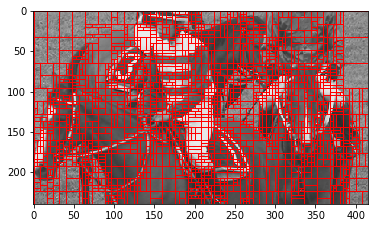

In [9]:
frame_partition(seq_name,"CTU",img,yuv_img,QP,currframe = 0)

In [39]:
def depth_label(test_seq,yuv_img_padding,yuv_img,CTU_index=0,cnt=0,frame_num = 0,QP = "QP",train=True):
    global data
    org_width,org_height = yuv_img.size
    #print(org_width,org_height )
    width , height = yuv_img_padding.size
    frame_padding = yuv_img_padding.convert('RGB')
    for beginy in range(0, height, 128):
        for beginx in range(0, width, 128):

            f = open("D:/frame/"+test_seq+"/"+QP+"/CTU_%d.txt"%CTU_index, "r")
            #print(beginy,beginx)
            #print(CTU_index)
            label_dict = [0]*16
            TT_dict = [0]*16
            label_dict_QT = [0]*16
            for line in f:   
                row = line.split(" ")
                startx,starty,depth,btdepth,mtdepth = int(row[0]),int(row[1]),int(row[4]), int(row[5]),int(row[6])
                cuheight , cuwidth = int(row[2]) , int(row[3])
                if startx == 0 and starty==0 and cuheight == 0 and cuwidth == 0:
                    continue
                if (startx - beginx)//32 == 0 and (starty - beginy)//32 == 0:
                    label_dict[0] = max(label_dict[0],2*depth+btdepth)
                    TT_dict[0] = max(TT_dict[0],btdepth-mtdepth)
                    label_dict_QT[0] = max(label_dict_QT[0],10*depth+btdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 0:
                    label_dict[1] = max(label_dict[1],2*depth+btdepth)
                    TT_dict[1] = max(TT_dict[1],btdepth-mtdepth)
                    label_dict_QT[1] = max(label_dict_QT[1],10*depth+btdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 0:
                    label_dict[2] = max(label_dict[2],2*depth+btdepth)
                    TT_dict[2] = max(TT_dict[2],btdepth-mtdepth)
                    label_dict_QT[2] = max(label_dict_QT[2],10*depth+btdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 0:
                    label_dict[3] = max(label_dict[3],2*depth+btdepth)
                    TT_dict[3] = max(TT_dict[3],btdepth-mtdepth)
                    label_dict_QT[3] = max(label_dict_QT[3],10*depth+btdepth)
                elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 1:
                    label_dict[4] = max(label_dict[4],2*depth+btdepth)
                    TT_dict[4] = max(TT_dict[4],btdepth-mtdepth)
                    label_dict_QT[4] = max(label_dict_QT[4],10*depth+btdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 1:
                    label_dict[5] = max(label_dict[5],2*depth+btdepth)
                    TT_dict[5] = max(TT_dict[5],btdepth-mtdepth)
                    label_dict_QT[5] = max(label_dict_QT[5],10*depth+btdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 1:
                    label_dict[6] = max(label_dict[6],2*depth+btdepth)
                    TT_dict[6] = max(TT_dict[6],btdepth-mtdepth)
                    label_dict_QT[6] = max(label_dict_QT[6],10*depth+btdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 1:
                    label_dict[7] = max(label_dict[7],2*depth+btdepth)
                    TT_dict[7] = max(TT_dict[7],btdepth-mtdepth)
                    label_dict_QT[7] = max(label_dict_QT[7],10*depth+btdepth)
                elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 2:
                    label_dict[8] = max(label_dict[8],2*depth+btdepth)
                    TT_dict[8] = max(TT_dict[8],btdepth-mtdepth)
                    label_dict_QT[8] = max(label_dict_QT[8],10*depth+btdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 2:
                    label_dict[9] = max(label_dict[9],2*depth+btdepth)
                    TT_dict[9] = max(TT_dict[9],btdepth-mtdepth)
                    label_dict_QT[9] = max(label_dict_QT[9],10*depth+btdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 2:
                    label_dict[10] = max(label_dict[10],2*depth+btdepth)
                    TT_dict[10] = max(TT_dict[10],btdepth-mtdepth)
                    label_dict_QT[10] = max(label_dict_QT[10],10*depth+btdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 2:
                    label_dict[11] = max(label_dict[11],2*depth+btdepth)
                    TT_dict[11] = max(TT_dict[11],btdepth-mtdepth)
                    label_dict_QT[11] = max(label_dict_QT[11],10*depth+btdepth)
                elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 3:
                    label_dict[12] = max(label_dict[12],2*depth+btdepth)
                    TT_dict[12] = max(TT_dict[12],btdepth-mtdepth)
                    label_dict_QT[12] = max(label_dict_QT[12],10*depth+btdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 3:
                    label_dict[13] = max(label_dict[13],2*depth+btdepth)
                    TT_dict[13] = max(TT_dict[13],btdepth-mtdepth)
                    label_dict_QT[13] = max(label_dict_QT[13],10*depth+btdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 3:
                    label_dict[14] = max(label_dict[14],2*depth+btdepth)
                    TT_dict[14] = max(TT_dict[14],btdepth-mtdepth)
                    label_dict_QT[14] = max(label_dict_QT[14],10*depth+btdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 3:
                    label_dict[15] = max(label_dict[15],2*depth+btdepth)
                    TT_dict[15] = max(TT_dict[15],btdepth-mtdepth)
                    label_dict_QT[15] = max(label_dict_QT[15],10*depth+btdepth)
            #print(label_dict)
            if label_dict[0] == 2 :
                label_dict[1] = 2
                label_dict[4] = 2
                label_dict[5] = 2
                TT_dict[1] = 0
                TT_dict[4] = 0
                TT_dict[5] = 0
                label_dict_QT[1] = 10
                label_dict_QT[4] = 10
                label_dict_QT[5] = 10
                
            if label_dict[2] == 2 :
                label_dict[3] = 2 
                label_dict[6] = 2
                label_dict[7] =  2
                TT_dict[3] = 0
                TT_dict[6] = 0
                TT_dict[7] = 0
                label_dict_QT[3] = 10
                label_dict_QT[6] = 10
                label_dict_QT[7] = 10
               
            if label_dict[8] == 2 :
                label_dict[9] = 2 
                label_dict[12] = 2 
                label_dict[13] = 2
                TT_dict[9] = 0
                TT_dict[12] = 0
                TT_dict[13] = 0
                label_dict_QT[9] = 10
                label_dict_QT[12] = 10
                label_dict_QT[13] = 10
               
            if label_dict[10] == 2 :
                label_dict[11] = 2 
                label_dict[14] = 2 
                label_dict[15] = 2
                TT_dict[11] = 0
                TT_dict[14] = 0
                TT_dict[15] = 0
                label_dict_QT[11] = 10 
                label_dict_QT[14] = 10 
                label_dict_QT[15] = 10
            #print(label_dict)
            #print(TT_dict)
            #print(label_dict_QT)
            index = 0
            for row_i in range(beginy, beginy+128, 32):
                for col_i in range(beginx, beginx+128, 32):
                    if col_i > org_width or col_i + 32 > org_width or row_i > org_height or row_i + 32 > org_height:
                        index +=1
                        continue
                    crop = frame_padding.crop((col_i, row_i, col_i + 32, row_i + 32))
                    if train == False: 
                        crop.save("D:/ValidEnd2End/"+QP+"/CU_"+test_seq+"_"+str(cnt)+".png","PNG")
                        imgname = "D:/ValidEnd2End/"+QP+"/CU_"+test_seq+"_"+str(cnt)+".png"
                        QTMT = label_dict[index]
                        TT = TT_dict[index]
                        if TT_dict[index] > 0:
                            TT = 1
                        QT = label_dict_QT[index]//10
                        if QT == 4:
                            QT = 3
                        data.append([imgname,QTMT,TT,QT])
                    elif  train == True :
                        crop.save("D:/TrainEnd2End/"+QP+"/CU_"+test_seq+"_"+str(cnt)+".png","PNG")
                        imgname = "D:/TrainEnd2End/"+QP+"/CU_"+test_seq+"_"+str(cnt)+".png"
                        QTMT = label_dict[index]
                        TT = TT_dict[index]
                        if TT_dict[index] > 0:
                            TT = 1
                        QT = label_dict_QT[index]//10
                        if QT == 4:
                            QT = 3
                        data.append([imgname,QTMT,TT,QT])
                    cnt+=1
                    index +=1
            
            CTU_index+=1
            #print(CTU_index)
    return CTU_index,cnt

In [41]:


QPList = ["QP22","QP27","QP32","QP37"]
#QPList = ["QP37"]

seq_list = ["Tango2","FoodMarket4","Campfire","CatRobot1","DaylightRoad2","ParkRunning3","MarketPlace","RitualDance",
            "Cactus","BasketballDrive","BQTerrace","RaceHorsesC","BQMall","PartyScene","BasketballDrill","RaceHorses",
            "BQSquare","BlowingBubbles","BasketballPass","FourPeople","Johnny","KristenAndSara"
            ]
#seq_list = {"intra_train_1":60,"intra_train_2":40,"intra_train_3":30,"intra_train_4":30}
#seq_list = {"intra_train_1":1}

for QP in QPList:
    data = []

    for seq_name in seq_list:
        CTU_index,cnt = 0,0
        
        print(seq_name)
        for i in range(1):
            img = frame_processing(seq_name,currframe = i)
            yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')
            yuv_img_padding = frame_padding(img)
            yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
            CTU_index,cnt = depth_label(seq_name,yuv_img_padding,yuv_img, CTU_index , cnt , i ,QP,False)
            #print(i,CTU_index,cnt)
            
    
        print("Finish") 
    df = pd.DataFrame(data, columns = ['filepath', 'QTMT', 'TT', 'QT']) 
    df.to_pickle("D:/ValidEnd2End/valid_"+QP+".pkl")

Tango2
Finish
FoodMarket4
Finish
Campfire
Finish
CatRobot1
Finish
DaylightRoad2
Finish
ParkRunning3
Finish
MarketPlace
Finish
RitualDance
Finish
Cactus
Finish
BasketballDrive
Finish
BQTerrace
Finish
RaceHorsesC
Finish
BQMall
Finish
PartyScene
Finish
BasketballDrill
Finish
RaceHorses
Finish
BQSquare
Finish
BlowingBubbles
Finish
BasketballPass
Finish
FourPeople
Finish
Johnny
Finish
KristenAndSara
Finish
Tango2
Finish
FoodMarket4
Finish
Campfire
Finish
CatRobot1
Finish
DaylightRoad2
Finish
ParkRunning3
Finish
MarketPlace
Finish
RitualDance
Finish
Cactus
Finish
BasketballDrive
Finish
BQTerrace
Finish
RaceHorsesC
Finish
BQMall
Finish
PartyScene
Finish
BasketballDrill
Finish
RaceHorses
Finish
BQSquare
Finish
BlowingBubbles
Finish
BasketballPass
Finish
FourPeople
Finish
Johnny
Finish
KristenAndSara
Finish
Tango2
Finish
FoodMarket4
Finish
Campfire
Finish
CatRobot1
Finish
DaylightRoad2
Finish
ParkRunning3
Finish
MarketPlace
Finish
RitualDance
Finish
Cactus
Finish
BasketballDrive
Finish
BQTerrac